To begin with, I have imported all the required libraries, including numpy and pandas. I used the pyplot sub package of matplotlib and rcParams to add style to the plots, as well as rainbow for colors, for visualization. I used the sklearn package to create Machine Learning models and handle data. 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.cm import rainbow
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

try:
    data = pd.read_csv('/Users/SanjayRao/Downloads/diabetes.csv', encoding='latin-1')
except pd.errors.ParserError as e:
    print("Error parsing the CSV file: {}".format(str(e)))
    # Handle the error or provide an alternative solution

data.info()

I imported the dataset now that I have all of the required libraries. diabetes.csv is the name of the dataset. To read the dataset, I have used the pandas read_csv function. After loading the dataset, I have analyzed it with the info() and desribe() functions before visualization. 

In [2]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,3.838583,120.990814,69.111549,20.528871,80.044619,32.009711,0.473542,33.209974,0.345144
std,3.366205,32.052825,19.425504,15.942813,115.489420,7.902391,0.332019,11.737851,0.475728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.750000,36.600000,0.628500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


I then visualized the data to better comprehend it. Looking at the correlation matrix below, it's clear that some characteristics have a negative connection with the outcome value, while others have a positive association. 

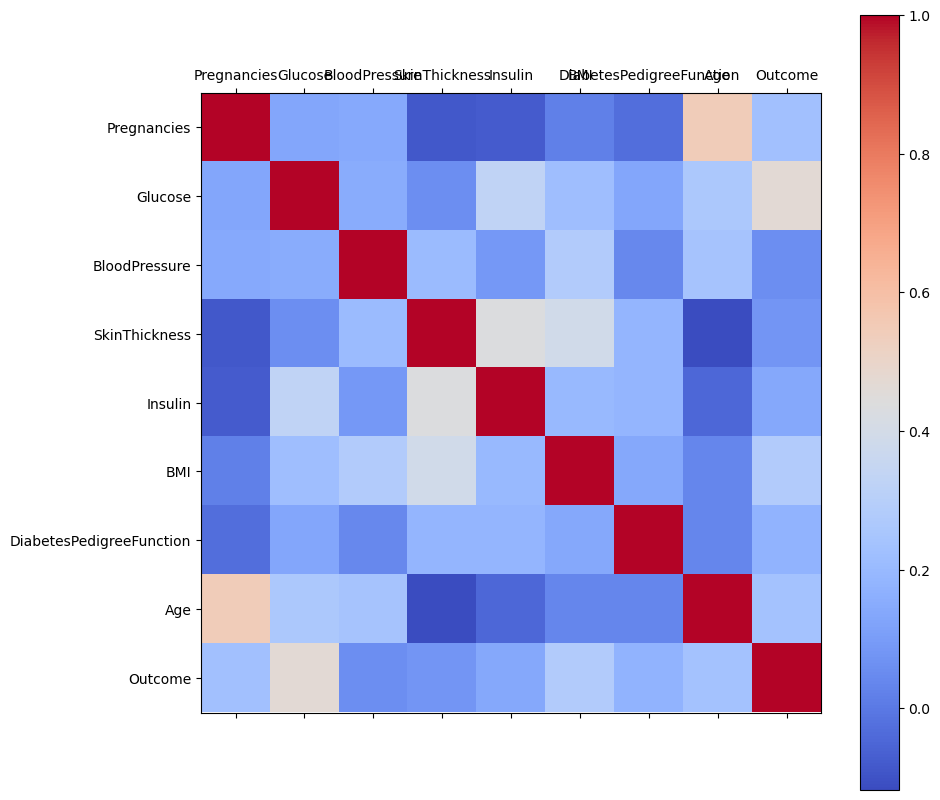

In [4]:
cmap = 'coolwarm'
rcParams['figure.figsize'] = 10, 10
plt.matshow(data.corr(), cmap=cmap)
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

We can see from the histograms below that the dataset may be used even though the characteristics have varied ranges. 

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

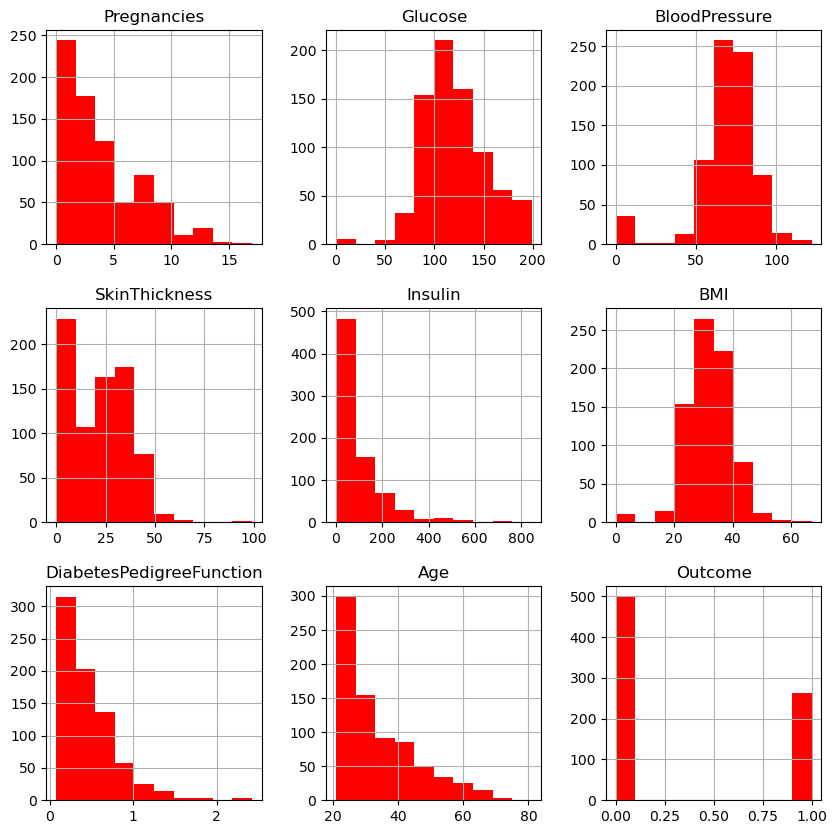

In [5]:
color = 'red'
data.hist(color=color)

The two groups are not precisely 50% each, but the ratio is sufficient to keep on without increasing / decreasing the data.

Text(0.5, 1.0, 'Count of Target Class')

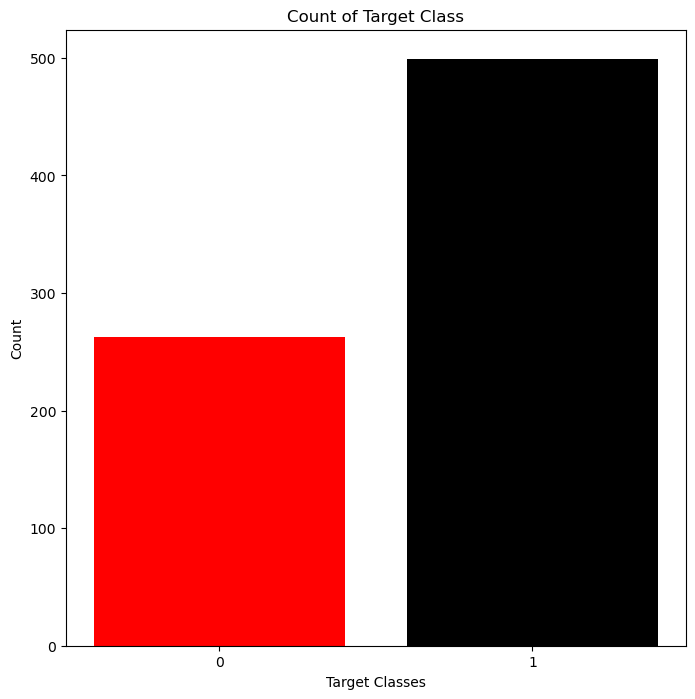

In [6]:
rcParams['figure.figsize'] = 8,8
plt.bar(data['Outcome'].unique(), data['Outcome'].value_counts(), color = ['black', 'red'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of Target Class')

I have used the train_test_split function to split the dataset for testing and training. The dataset was then separated into training and testing datasets using train_test_split. 

In [17]:
from sklearn.model_selection import train_test_split
y = data['Outcome']
X = data.drop(['Outcome'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Random Forest Classifier: 
I'll build the model using the ensemble approach, Random Forest Classifier, and experiment with the number of estimators to see how they affect it. The model is then trained, and the results are recorded. To compare the scores, I created a bar graph. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_s = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_s.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest scores for estimators')

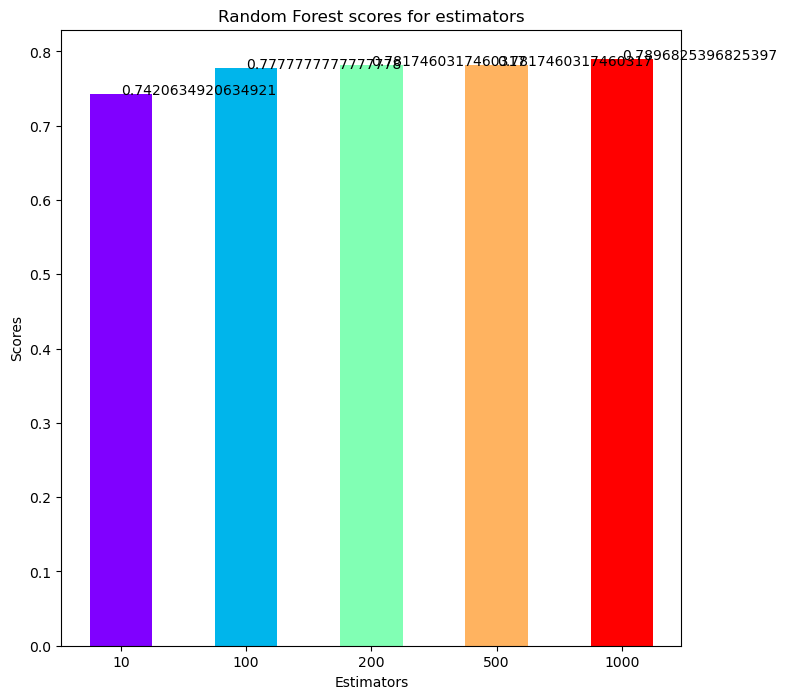

In [9]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_s, color = colors, width = 0.5)
for i in range(len(estimators)):
    plt.text(i, rf_s[i], rf_s[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Estimators')
plt.ylabel('Scores')
plt.title('Random Forest scores for estimators')

In [10]:
print("The Random Forest Classifier score is {}% with {} estimators.".format(rf_s[1]*100, [100, 500]))

The Random Forest Classifier score is 77.77777777777779% with [100, 500] estimators.


# Decision Tree Classifier: 

For the second model, I imported the Decision Tree Classifier's machine learning method and utilized the classifier to simulate the problem at hand. The model achieved the best accuracy at three values of maximum features, 2, 4 and 18. 

Text(0.5, 1.0, 'Decision Tree scores for different features')

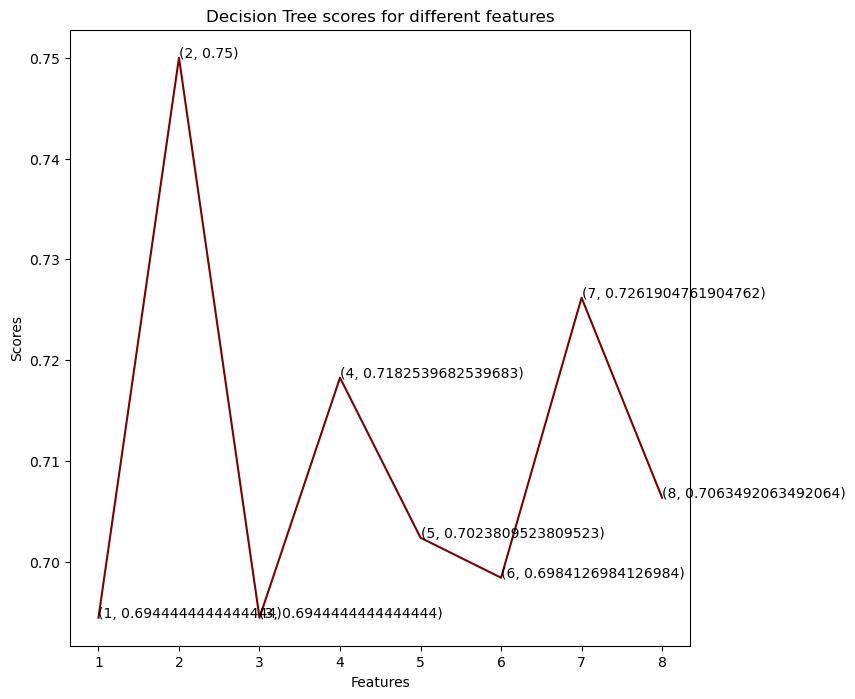

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt_s = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_s.append(dt_classifier.score(X_test, y_test))


plt.plot([i for i in range(1, len(X.columns) + 1)], dt_s, color = 'maroon')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_s[i-1], (i, dt_s[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Decision Tree scores for different features')

In [12]:
print("The Decision Tree Classifier score is {}% with {} maximum features.".format(dt_s[3]*100, [2,3,4]))

The Decision Tree Classifier score is 71.82539682539682% with [2, 3, 4] maximum features.


# Support Vector Classifier:

Because there are several kernels for Support Vector Classifier, I tried a few of them and recorded their best results. I then created a bar plot for each kernel to see which performed the best.

Text(0.5, 1.0, 'Support Vector scores for different kernels')

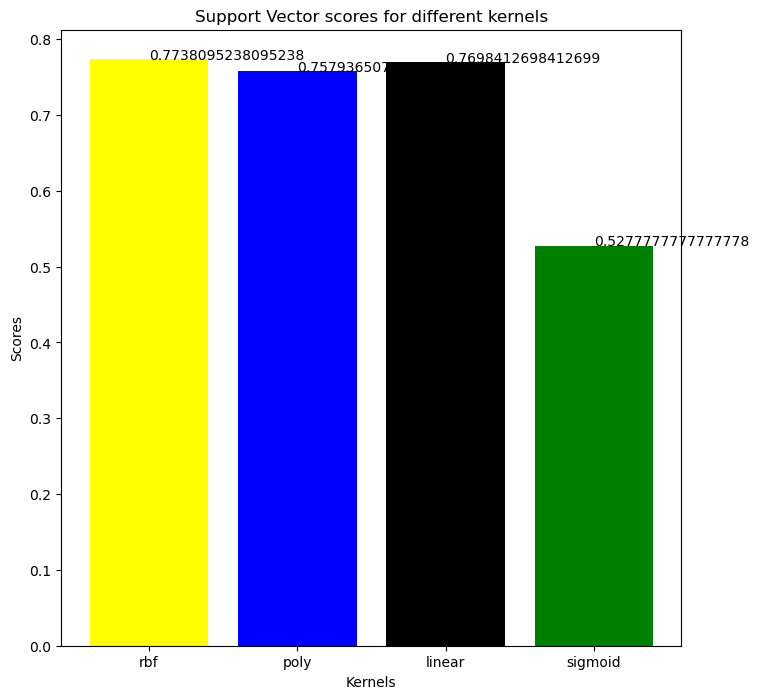

In [13]:
from sklearn.svm import SVC
svc_s = []
kernels = ['rbf', 'poly', 'linear', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_s.append(svc_classifier.score(X_test, y_test))


# In[17]:


plt.bar(kernels, svc_s, color=['yellow', 'blue', 'black', 'green'])
for i in range(len(kernels)):
    plt.text(i, svc_s[i], svc_s[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector scores for different kernels')

In [14]:
print("Support Vector Classifier score is {}% with {} kernel.".format(svc_s[0]*100, 'Linear'))

Support Vector Classifier score is 77.38095238095238% with Linear kernel.


# K Neighbors Classifier: 

The classification score differs based on values of neighbors that are chosen. I have plotted a score graph for different values of K to check for the highest score.

Text(0.5, 1.0, 'K Neighbors Classifier for different K values')

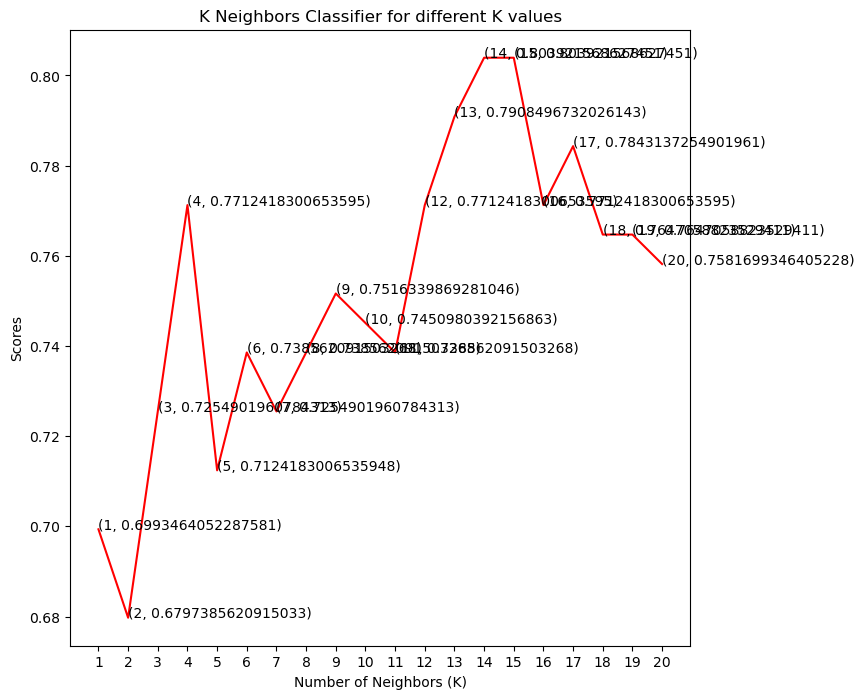

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_s = []
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    knn_s.append(knn_classifier.score(X_test, y_test))

plt.plot([k for k in range(1, 21)], knn_s, color = 'red')
for i in range(1,21):
    plt.text(i, knn_s[i-1], (i, knn_s[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier for different K values')

In [16]:
print("K Neighbors Classifier score is {}% with {} nieghbors.".format(knn_s[11]*100, 8))

K Neighbors Classifier score is 77.12418300653596% with 8 nieghbors.


# Conclusion:

In conclusion, I have employed ML models to identify diabetes in individuals. I have analyzed the diabets.csv data using various plots. In addition, I used four machine learning algorithms: the Random Forest Classifier, the Decision Tree Classifier, the Support Vector Classifier, and the K Neighbors Classifier. The parameters for each model's outcomes were compared. The two classifiers with the highest scores, the Random Forest Classifier, and the K Neighbors Classifier, were 77.95% and 77.92%, respectively.